#### Code to plot Figures S2A,B  in Mahdavi &Siegel (2020) AS&T
Both figures are in the Supplemental Information (SI).

Figure S2A illustrates the standard size distribution of ISO A2 and ASHRAE #2 test dust samples.
Figure S2B compares the measured size distribution of ISO A2 test dust sample along with the results published from Powder Technology Inc., (the company we purchased our dust samples for testing and research purposes years ago).

Plot type: Line plot.

In [1]:
from matplotlib import pyplot as plt
from matplotlib import container
import pandas as pd
import numpy as np

df = pd.read_excel(r'artl_v_psd_master.xlsx')

# Keeping those necessary columns that have test dust mean, min and max psds for central and error illustrations
df = df[['Size', 
         'Eval_010_iso2_11e_td_180326_am_mean', 'Eval_010_iso2_11e_td_180326_am_min', 'Eval_010_iso2_11e_td_180326_am_max',
         'Eval_001_ash2_11e_td_171128_am_mean', 'Eval_001_ash2_11e_td_171128_am_min', 'Eval_001_ash2_11e_td_171128_am_max']]

# Converting min/max values to the the magnitude of the error bars
df.iloc[:,2] = df.iloc[:,1] - df.iloc[:,2]
df.iloc[:,3] = df.iloc[:,3] - df.iloc[:,1]

df.iloc[:,5] = df.iloc[:,4] - df.iloc[:,5]
df.iloc[:,6] = df.iloc[:,6] - df.iloc[:,4]


In [4]:
df.iloc[13:,].head() # observations from 13th index where the psd starts to rise shown

,Size,Eval_010_iso2_11e_td_180326_am_mean,Eval_010_iso2_11e_td_180326_am_min,Eval_010_iso2_11e_td_180326_am_max,Eval_001_ash2_11e_td_171128_am_mean,Eval_001_ash2_11e_td_171128_am_min,Eval_001_ash2_11e_td_171128_am_max
13,0.447,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000
14,0.501,0.082,2.000000e-03,8.000000e-03,0.060,0.000,0.000
15,0.562,0.300,0.000000e+00,0.000000e+00,0.218,0.008,0.002
16,0.631,0.604,4.000000e-03,6.000000e-03,0.454,0.014,0.006
17,0.708,0.920,1.110223e-16,-1.110223e-16,0.702,0.022,0.008


#### Figure S2A
With 4 filter types and 2 test dust sample types, there will be 8 (four times two) figures. Given three statstical properties (mean, min, and max). This will cause two for loops inside each other, as coded below:

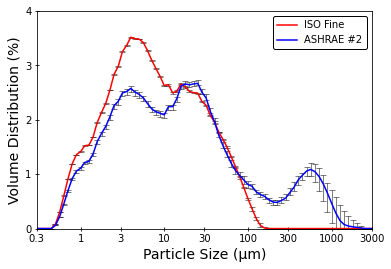

In [5]:
plt.figure()
plt.errorbar(df['Size'], df.iloc[:,1],
             yerr = [df.iloc[:,2], df.iloc[:,3]],
             xerr = None,
             capsize = 3, c = "r", ecolor = 'k', elinewidth = 0.5, capthick = 0.5,
             label = 'ISO Fine')
 
plt.errorbar(df['Size'], df.iloc[:,4],
             yerr = [df.iloc[:,5], df.iloc[:,6]],
             xerr = None,
             capsize = 3, c = "b", ecolor = 'k', elinewidth = 0.5, capthick = 0.5,
             label = 'ASHRAE #2')

plt.xscale('log')

plt.xlim(0.3, 3000)
a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 4)
plt.yticks(np.arange(0, 5, step=1))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()

new_handles = []

for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', framealpha=1)

plt.savefig(r'FigureS2.jpg', format='jpg', dpi=1600, bbox_inches='tight')

end of the code

#### Figure S2A


In [6]:
df = pd.read_excel(backslash_correct(r'QA_ldps_iso.xlsx'))
df = pd.concat([df.iloc[1:,0],df.iloc[1:,8:11], df.iloc[1:,12:15]], axis = 1)

# Converting min/max values to the the magnitude of the error bars
df.iloc[:,2] = df.iloc[:,1] - df.iloc[:,2]
df.iloc[:,3] = df.iloc[:,3] - df.iloc[:,1]

df.iloc[:,5] = df.iloc[:,4] - df.iloc[:,5]
df.iloc[:,6] = df.iloc[:,6] - df.iloc[:,4]

In [7]:
df.head()

,Size_Below,mes_mea,mes_min,mes_max,pti_mea,pti_min,pti_max
1,0.97,4.098,0.008,0.012,5.00,0.50,0.50
2,1.38,8.644,0.014,0.026,8.75,0.75,0.75
3,2.75,21.736,0.056,0.054,22.30,1.00,1.00
4,5.50,41.842,0.112,0.098,41.00,1.50,1.50
5,11.00,60.246,0.116,0.134,58.25,1.25,1.25


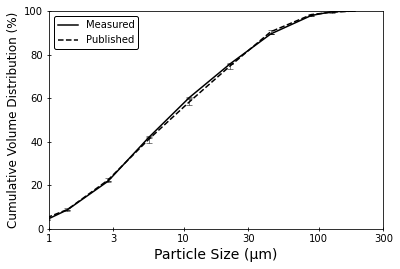

In [8]:
plt.figure()
plt.errorbar(df['Size_Below'], df.iloc[:,1],
             yerr = [df.iloc[:,2], df.iloc[:,3]],
             xerr = None,
             capsize = 3, c = "k", ecolor = 'k', elinewidth = 0.5, capthick = 0.5,
             label = 'Measured')
 
plt.errorbar(df['Size_Below'], df.iloc[:,4],
             yerr = [df.iloc[:,5], df.iloc[:,6]],
             xerr = None,
             capsize = 3, c = "k", ecolor = 'k', linestyle = '--', elinewidth = 0.5, capthick = 0.5,
             label = 'Published')

plt.xscale('log')

plt.xlim(1, 300)
a = [1, 3, 10, 30, 100, 300]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, step=20))
plt.ylabel('Cumulative Volume Distribution (%)', size = 12)

plt.tick_params(axis = 'both', direction = 'inout')

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()

new_handles = []

for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

ax.legend(new_handles, labels, loc = 2, frameon = True, edgecolor = 'black', framealpha=1)

plt.savefig(r'FigureS2a.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code